### Heart Attack Analysis & Prediction Project with ML

**Data Content (Veri Setindeki Değişkenleri İnceleyelim)**

- Age: Age of the patient
- Sex: Sex of the patient
- exang: exercise induced angina (1 = yes; 0 = no)
- ca: number of major vessels (0-3)
- cp: Chest Pain type chest pain type
  - Value 1: typical angina
  - Value 2: atypical angina
  - Value 3: non-anginal pain
  - Value 4: asymptomatic
- trtbps: resting blood pressure (in mm Hg)
- chol: cholestoral in mg/dl fetched via BMI sensor
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- rest_ecg: resting electrocardiographic results
  - Value 0: normal
  - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
  - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach: maximum heart rate achieved
- target: 0= less chance of heart attack 1= more chance of heart attack

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve

import warnings
warnings.filterwarnings("ignore")

In [2]:
# read data 
df = pd.read_csv("C:\\Users\\Monster\\Desktop\\dataa\\csv_files\\heart_attack_analysis.csv")

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# describe basic statistics of data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
# information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
####################################
# Missing Value Analysis
####################################

df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

- Veri setimizde eksik değer(missing value) probleminin olmadığını gözlemledik.

In [6]:
####################################
# Unique Value Analysis
####################################

for i in list(df.columns):
    print("{} -- {}".format(i, df[i].value_counts().shape[0]))

age -- 41
sex -- 2
cp -- 4
trestbps -- 49
chol -- 152
fbs -- 2
restecg -- 3
thalach -- 91
exang -- 2
oldpeak -- 40
slope -- 3
ca -- 5
thal -- 4
target -- 2


- Hangi sütunda(feature) kaç tane eşsiz değer yani kaç sınıf olduğunu bu şekilde inceliyoruz ve buradan hangi değişkenlerin kategorik değişken hangilerinin sayısal değişken olduğunu anlayabiliyoruz.

- Mesela "sex" değişkeninde sadece 2 değişken old. göre bu kategorik değişkendir. Aynı şekilde thal değişkeninde de sadece 5 sınıf var o halde bu da kategorik değişkendir.

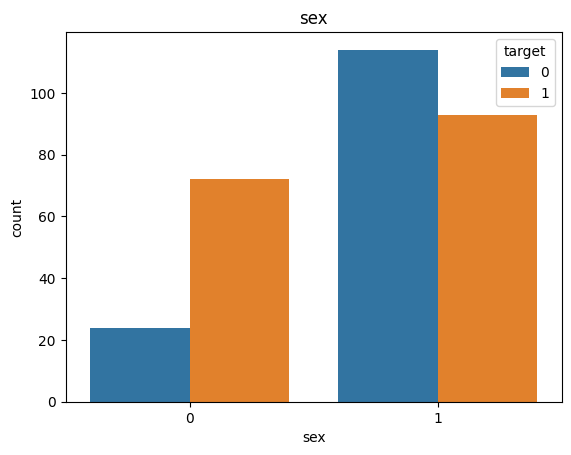

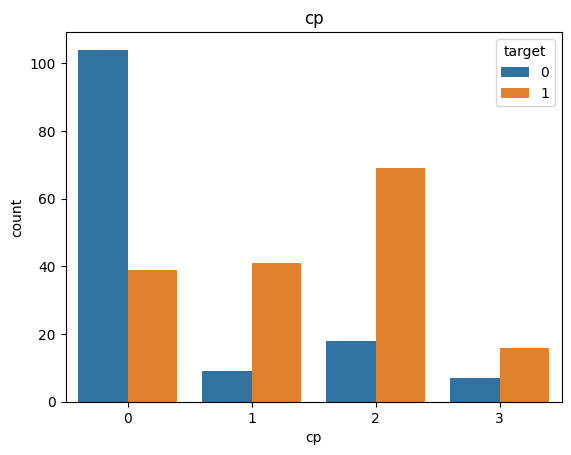

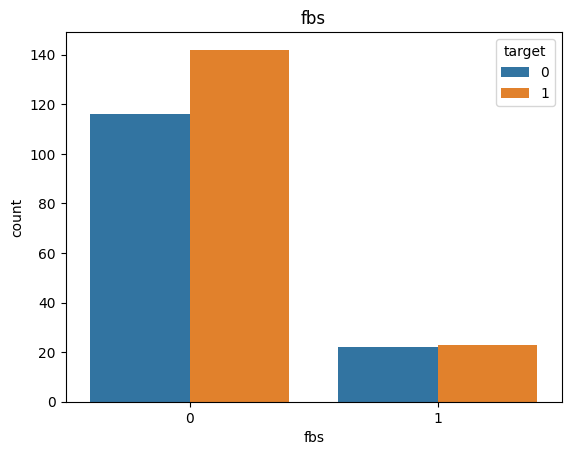

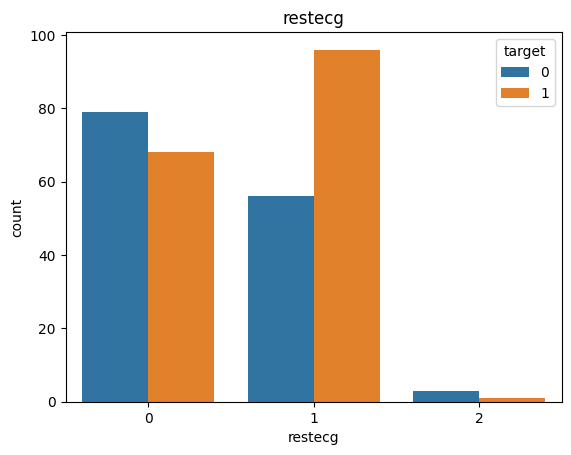

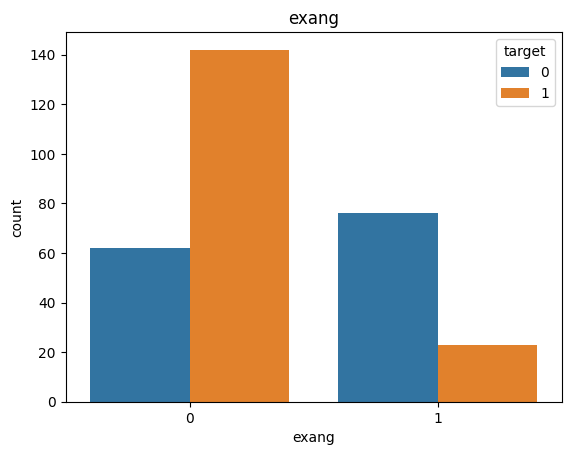

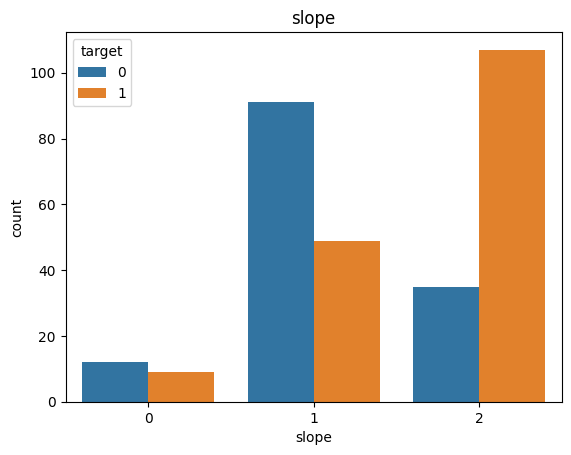

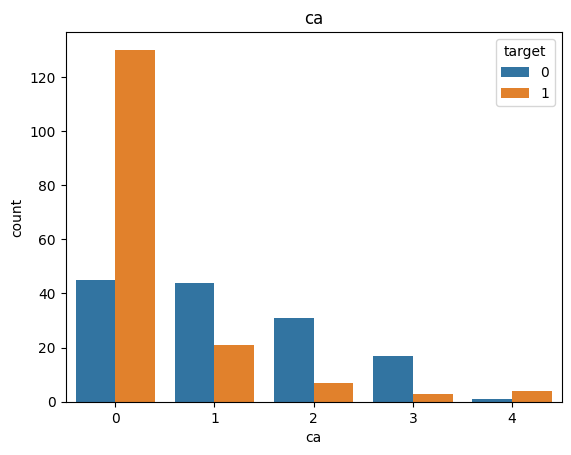

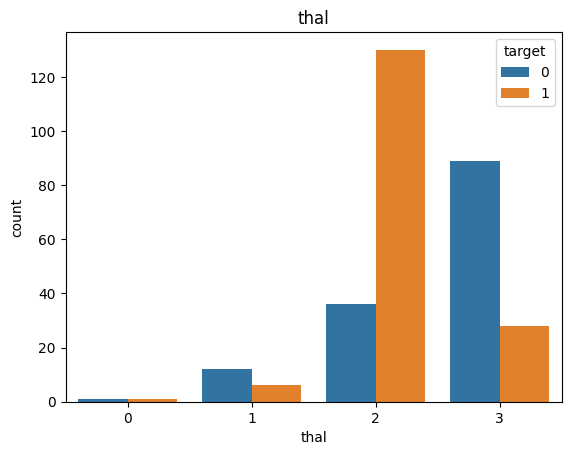

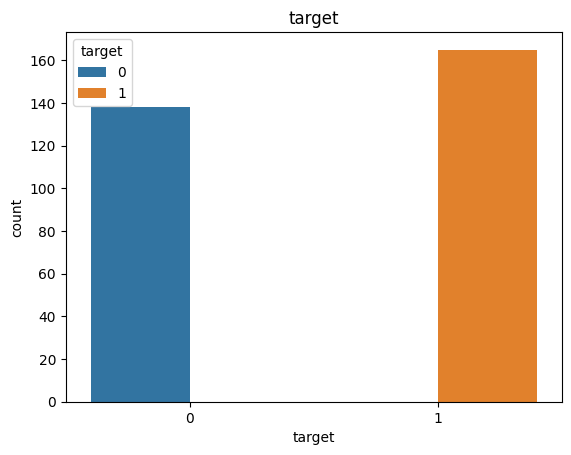

In [9]:
####################################
# Categorical Feature Analysis
####################################

categorical_list = ["sex", "cp","fbs","restecg","exang","slope","ca","thal","target"]

df_categoric = df.loc[:, categorical_list]
for i in categorical_list:
    plt.figure()
    sns.countplot(x = i, data = df_categoric, hue = "target")
    plt.title(i)

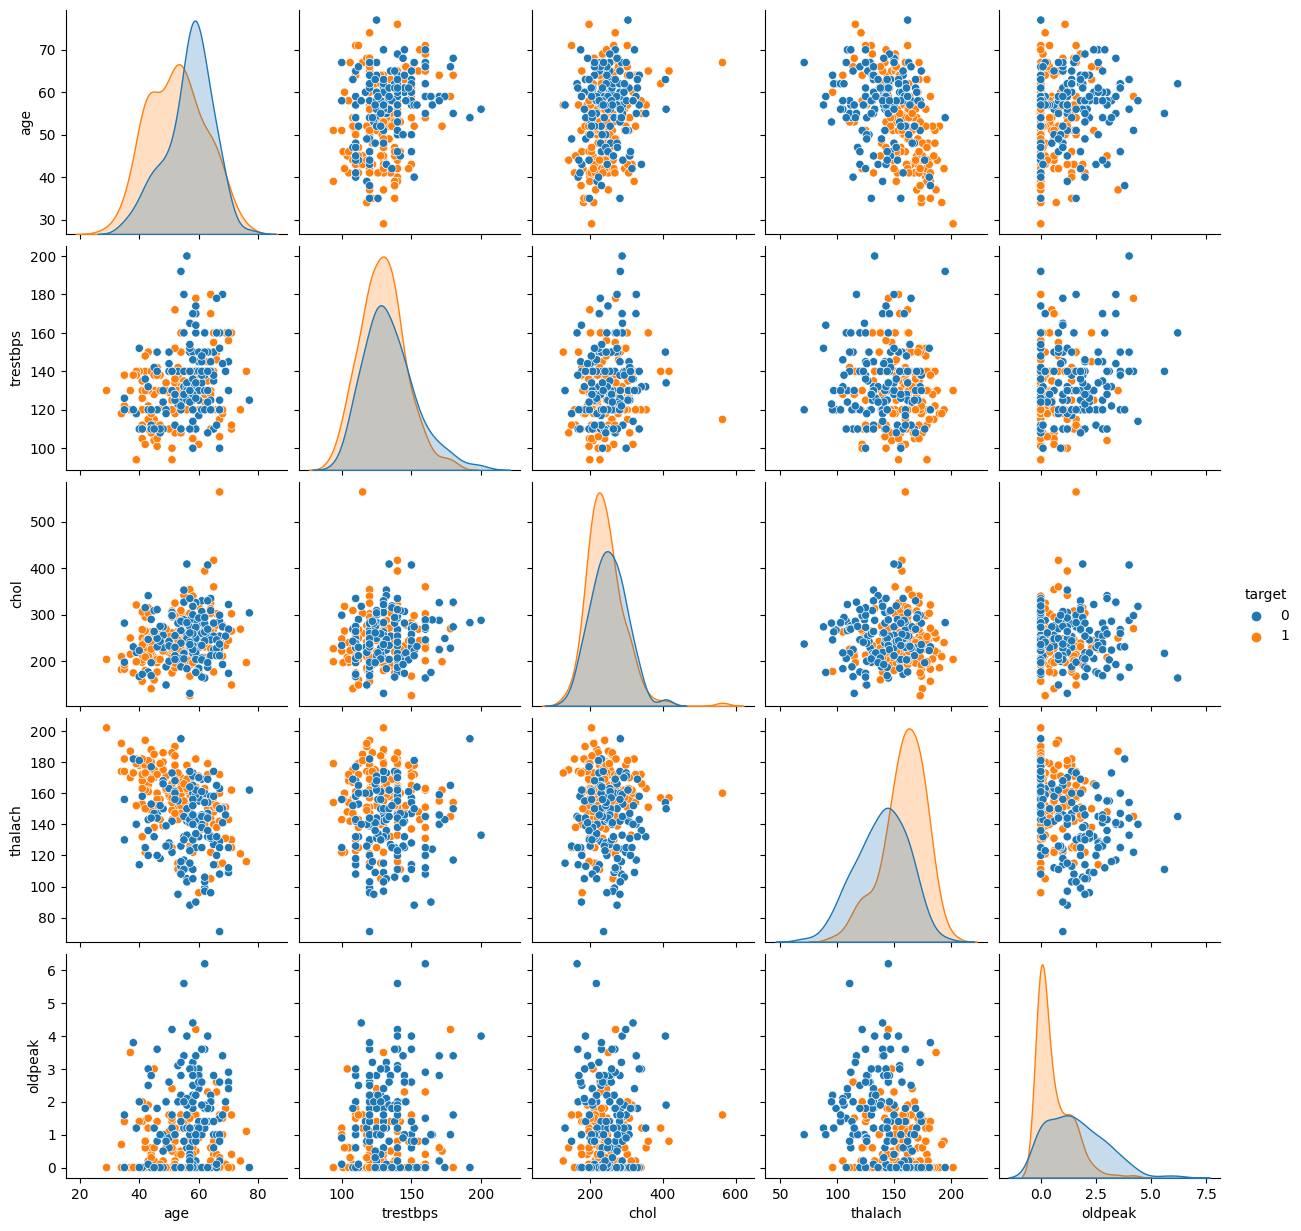

In [10]:
####################################
# Numeric Feature Analysis
####################################

numeric_list = ["age", "trestbps","chol","thalach","oldpeak","target"]

df_numeric = df.loc[:, numeric_list]
sns.pairplot(df_numeric, hue = "target", diag_kind = "kde")
plt.show()

In [11]:
####################################
# Standardization
####################################

scaler = StandardScaler()
scaled_array = scaler.fit_transform(df[numeric_list[:-1]]) # target zaten 0 ve 1'den oluşuyor onu standardize edemeyiz

scaled_array

array([[ 0.9521966 ,  0.76395577, -0.25633371,  0.01544279,  1.08733806],
       [-1.91531289, -0.09273778,  0.07219949,  1.63347147,  2.12257273],
       [-1.47415758, -0.09273778, -0.81677269,  0.97751389,  0.31091206],
       ...,
       [ 1.50364073,  0.70684287, -1.029353  , -0.37813176,  2.03630317],
       [ 0.29046364, -0.09273778, -2.2275329 , -1.51512489,  0.13837295],
       [ 0.29046364, -0.09273778, -0.19835726,  1.0649749 , -0.89686172]])

In [12]:
df_dummy = pd.DataFrame(scaled_array, columns = numeric_list[:-1])
df_dummy.head()

,age,trestbps,chol,thalach,oldpeak
0,0.952197,0.763956,-0.256334,0.015443,1.087338
1,-1.915313,-0.092738,0.072199,1.633471,2.122573
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705
4,0.290464,-0.663867,2.082050,0.583939,-0.379244


In [13]:
df_dummy = pd.concat([df_dummy, df.loc[:, "target"]], axis = 1)
df_dummy.head()

,age,trestbps,chol,thalach,oldpeak,target
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1


In [14]:
data_melted = pd.melt(df_dummy, id_vars = "target", var_name = "features", value_name = "value")
data_melted.head(20)

,target,features,value
0,1,age,0.952197
1,1,age,-1.915313
2,1,age,-1.474158
3,1,age,0.180175
4,1,age,0.290464
5,1,age,0.290464
6,1,age,0.180175
7,1,age,-1.143291
8,1,age,-0.260980
9,1,age,0.290464


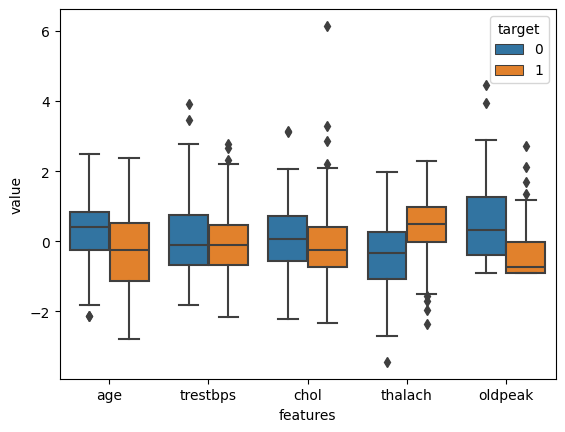

In [15]:
# box plot
# box plot analizi ile outlier'ları da görebiliyoruz

plt.figure()
sns.boxplot(x = "features", y = "value", hue = "target", data= data_melted)
plt.show()

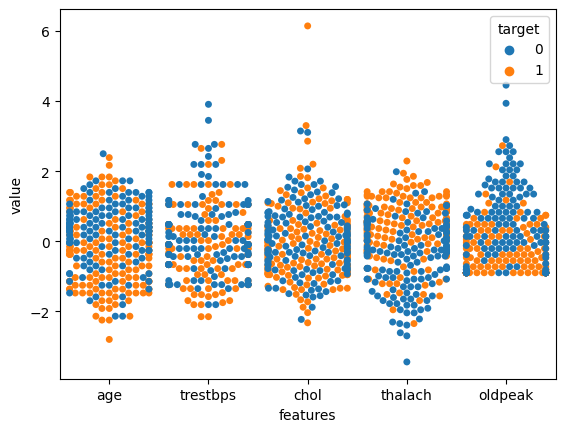

In [16]:
####################################
# Swarm Plot Analysis
####################################

# box plota göre daha detaylı

plt.figure()
sns.swarmplot(x = "features", y = "value", hue = "target", data= data_melted)
plt.show()

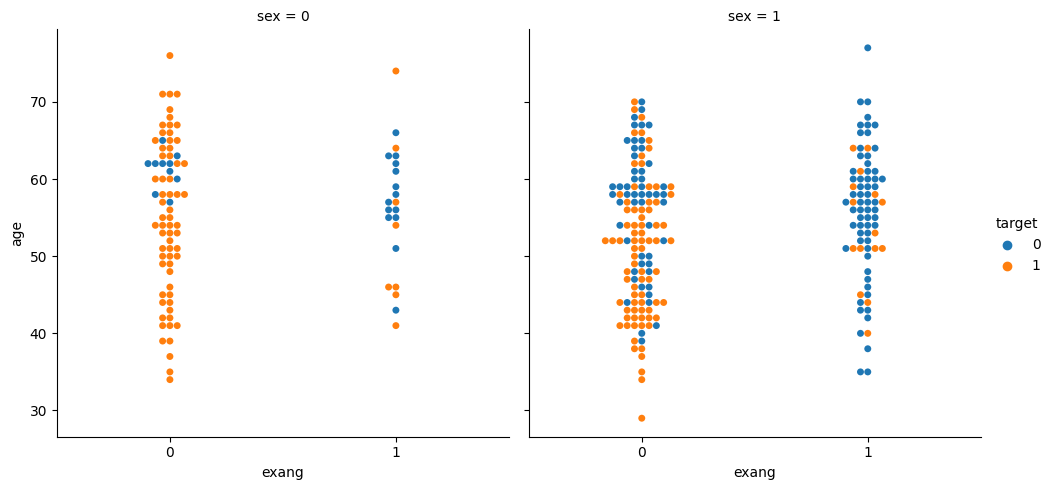

In [17]:
####################################
# Cat Plot Analysis
####################################

sns.catplot(x = "exang", y = "age", hue = "target", col = "sex", kind = "swarm", data = df)
plt.show()

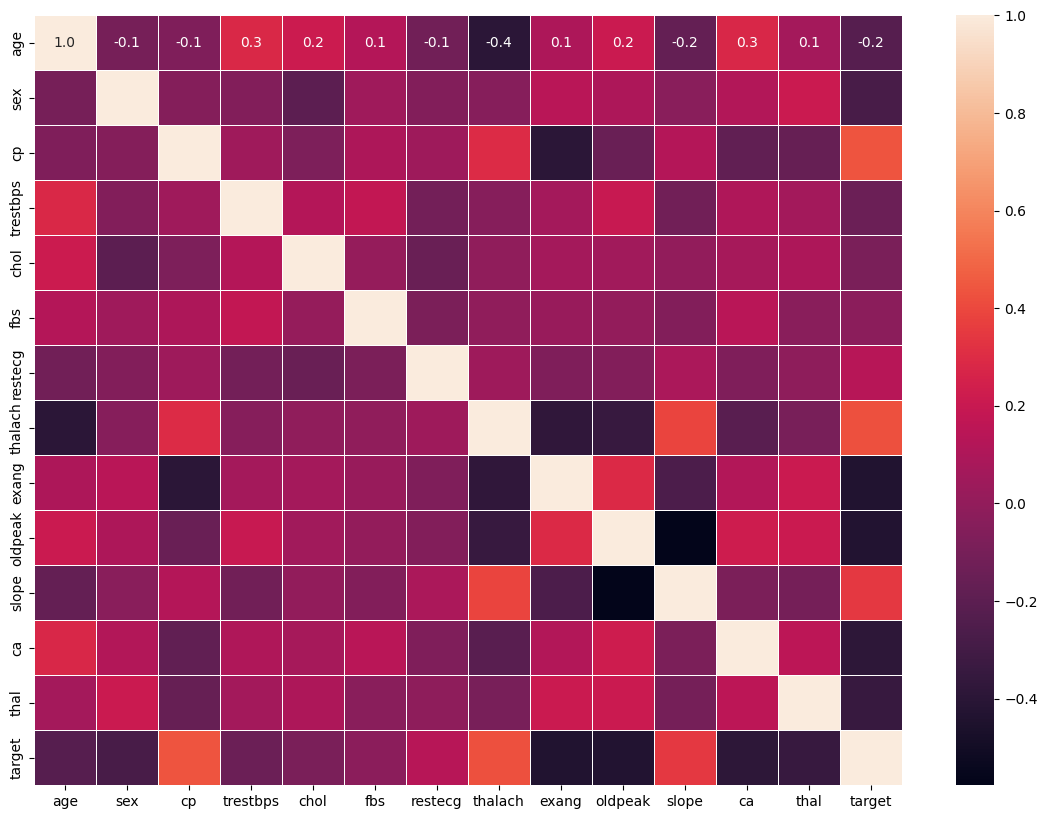

In [18]:
####################################
# Correlation Analysis
####################################

plt.figure(figsize = (14,10))
sns.heatmap(df.corr(), annot = True, fmt = ".1f", linewidths = .7)
plt.show()

In [19]:
####################################
# Outlier Detection
####################################

numeric_list = ["age", "trestbps","chol","thalach","oldpeak"]
df_numeric = df.loc[:, numeric_list]
df_numeric.head()

,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


In [20]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [21]:
# outlier detection
for i in numeric_list:
    
    # IQR : %75 - %25
    Q1 = np.percentile(df.loc[:, i],25) # %25
    Q3 = np.percentile(df.loc[:, i],75) # %75
    
    IQR = Q3 - Q1
    
    print("Old shape: ", df.loc[:, i].shape)
    
    # upper bound = %75 + IQR*2.5
    upper = np.where(df.loc[:, i] >= (Q3 + 2.5*IQR))
    
    # lower bound = %25 - IQR*2.5
    lower = np.where(df.loc[:, i] <= (Q1 - 2.5*IQR))
    
    print("{} -- {}".format(upper, lower))
    
    try:
        df.drop(upper[0], inplace = True)
    except: print("KeyError: {} not found in axis".format(upper[0]))
    
    try:
        df.drop(lower[0], inplace = True)
    except:  print("KeyError: {} not found in axis".format(lower[0]))
        
    print("New shape: ", df.shape)

Old shape:  (303,)
(array([], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (303, 14)
Old shape:  (303,)
(array([223, 248], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (301, 14)
Old shape:  (301,)
(array([85], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (300, 14)
Old shape:  (300,)
(array([], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (300, 14)
Old shape:  (300,)
(array([203, 220], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (298, 14)


#### Modelling:

In [22]:
df1 = df.copy()

In [23]:
# categorical to numeric: one hot encoding
df1 = pd.get_dummies(df1, columns = categorical_list[:-1], drop_first = True)
df1.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,True,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,37,130,250,187,3.5,1,True,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,41,130,204,172,1.4,1,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,56,120,236,178,0.8,1,True,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,57,120,354,163,0.6,1,False,False,False,False,...,True,False,True,False,False,False,False,False,True,False


In [24]:
X = df1.drop(["target"], axis = 1)
y = df1[["target"]]

scaler = StandardScaler()

# kategorik değişkenleri scale etmemiz gerekiyor onları dışarıda bırakalım
X[numeric_list[:-1]] = scaler.fit_transform(X[numeric_list[:-1]])
X.head()

,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.965901,0.845093,-0.236684,0.021855,2.3,True,False,False,True,True,...,False,False,False,False,False,False,False,True,False,False
1,-1.902555,-0.061886,0.119326,1.639116,3.5,True,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
2,-1.461254,-0.061886,-0.843995,0.983470,1.4,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
3,0.193624,-0.666538,-0.173859,1.245729,0.8,True,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
4,0.303950,-0.666538,2.297269,0.590082,0.6,False,False,False,False,False,...,True,False,True,False,False,False,False,False,True,False


In [25]:
#####################
# train-test split
#####################

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print("X_train: {}".format(X_train.shape))
print("X_test: {}".format(X_test.shape))
print("y_train: {}".format(y_train.shape))
print("y_test: {}".format(y_test.shape))

X_train: (238, 22)
X_test: (60, 22)
y_train: (238, 1)
y_test: (60, 1)


In [26]:
# Logistic Regression

logreg = LogisticRegression()

# fitting = training
logreg.fit(X_train, y_train)

# calculate probabilities
y_pred_prob = logreg.predict_proba(X_test)
y_pred_prob

array([[0.0973584 , 0.9026416 ],
       [0.93103193, 0.06896807],
       [0.74121243, 0.25878757],
       [0.0338319 , 0.9661681 ],
       [0.12817869, 0.87182131],
       [0.48715908, 0.51284092],
       [0.08547246, 0.91452754],
       [0.27115161, 0.72884839],
       [0.46280607, 0.53719393],
       [0.66130155, 0.33869845],
       [0.35648577, 0.64351423],
       [0.97327945, 0.02672055],
       [0.94242586, 0.05757414],
       [0.21865894, 0.78134106],
       [0.15032135, 0.84967865],
       [0.06081957, 0.93918043],
       [0.02890628, 0.97109372],
       [0.08660409, 0.91339591],
       [0.44194183, 0.55805817],
       [0.4361719 , 0.5638281 ],
       [0.02995524, 0.97004476],
       [0.10770505, 0.89229495],
       [0.81624537, 0.18375463],
       [0.04579736, 0.95420264],
       [0.78350722, 0.21649278],
       [0.86699817, 0.13300183],
       [0.9456117 , 0.0543883 ],
       [0.44276301, 0.55723699],
       [0.03510764, 0.96489236],
       [0.54918807, 0.45081193],
       [0.

In [27]:
# yukarıda sınıfların gerçekleşme olasılıkları var, onları kesin sınıf değerlerine çevirelim
y_pred = np.argmax(y_pred_prob, axis = 1)
y_pred

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1], dtype=int64)

In [28]:
print("Test accuracy: {}".format(accuracy_score(y_pred, y_test)))

Test accuracy: 0.9


In [29]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])

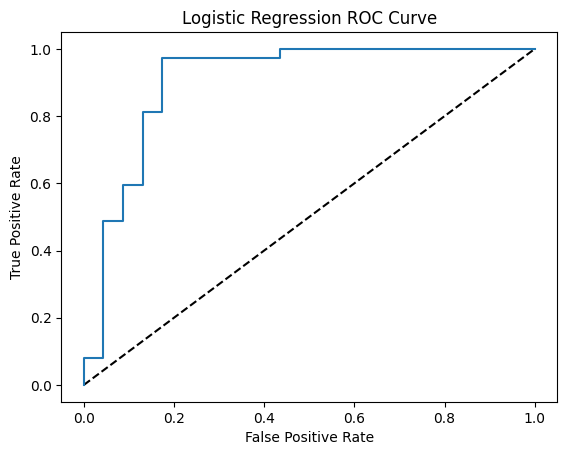

In [30]:
# plot curve
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr, tpr, label = "Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.show()

#### Logistic Regression Hyperparameter Tuning:

In [31]:
lr = LogisticRegression()

penalty = ["l1", "l2"]

parameters = {"penalty":penalty}

lr_searcher = GridSearchCV(lr, parameters)

lr_searcher.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2']})

In [32]:
print("Best parameters: ",lr_searcher.best_params_)

Best parameters:  {'penalty': 'l2'}


In [34]:
y_pred = lr_searcher.predict(X_test)

y_pred

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1], dtype=int64)

In [35]:
print("Test accuracy: {}".format(accuracy_score(y_pred, y_test)))

Test accuracy: 0.9
